# Partial Least Squares Regression

### Import packages
Import pandas and numpy for URL based reading of data and conversion to numpy array. Then import hoggorm and hoggormplot for PLSR analysis and visualization. Finally, import pyplot from matplotlib to enable custom plots not covered by hoggormplot.

In [1]:
import pandas as pd
import numpy as np
import hoggorm as hogg
import hoggormplot as hplot
import matplotlib.pyplot as plt

## Partial Least Squares regression in sensometrics

### Read data
Read cheese fluorescence and sensory data in white space separated, header-less table format from GitHub into numpy array.

In [2]:
fluorescence = np.array(pd.read_table('https://raw.githubusercontent.com/khliland/hoggormExamples/master/data/cheese_fluorescence.txt', \
                             header = None, sep = '\s+'))
sensory = np.array(pd.read_table('https://raw.githubusercontent.com/khliland/hoggormExamples/master/data/cheese_sensory.txt', \
                             header = None, sep = '\s+'))

### Perform PLSR on sensory data
Extract 4 components using the Non-Linear Partial Least Squares (NIPALS) based PLSR version and use leave-one-out cross-validation for model evaluation/summaries.

In [3]:
SENSORYplsr = hogg.nipalsPLS2(fluorescence, sensory, 4, cvType = ["loo"])

loo


### Numerical output
Show cummulative explained variance: $$R^2 = 1-\frac{SSE}{SST}$$ and cross-validated root mean squared error: $$RMSECV = \sqrt{\frac{1}{n} \sum_{i=1}^n (y_i-\hat{y}_i)^2}$$.

In [4]:
SENSORYplsr.Y_cumCalExplVar()

[0.0,
 23.876432375302112,
 67.01274026110397,
 69.609283955816,
 72.82848281091037]

In [5]:
SENSORYplsr.Y_RMSECV()

array([0.70868365, 0.67183707, 0.48559615, 0.48913267, 0.49683274])

### Plotting
The explained variance shows what percentage of the spectral variation is covered by the PCA up to a chosen number of components.

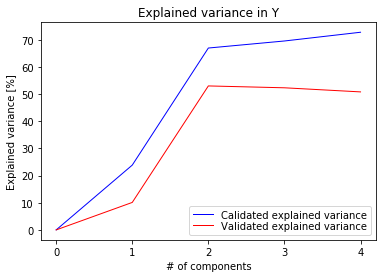

In [6]:
hplot.explainedVariance(SENSORYplsr)

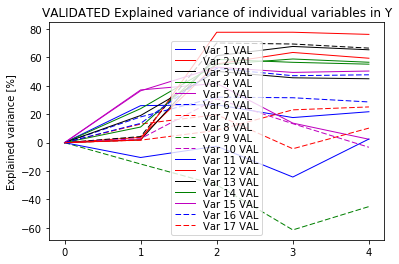

In [7]:
hplot.explainedVariance(SENSORYplsr, individual = True)

The score plot shows how the sensory assessments relate to each other in a two dimensional compressed space. Calibrated explained variances for the axes are indicated on the axes.

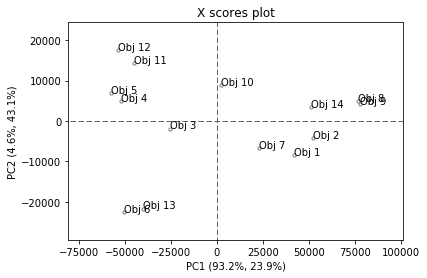

In [8]:
hplot.scores(SENSORYplsr)

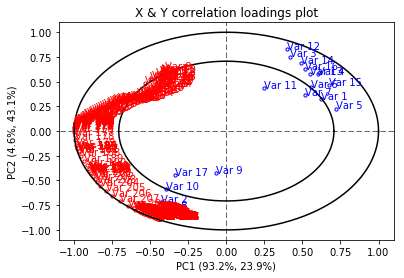

In [18]:
hplot.correlationLoadings(SENSORYplsr)

## Partial Least Squares Regression in spectroscopy

### Read data
Read gasoline NIR and octane data in white space separated, header-less table format from GitHub into numpy array.

In [9]:
NIR = np.array(pd.read_table('https://raw.githubusercontent.com/khliland/hoggormExamples/master/data/gasoline_NIR.txt', \
                             header = None, sep = '\s+'))
octane = np.array(pd.read_table('https://raw.githubusercontent.com/khliland/hoggormExamples/master/data/gasoline_octane.txt', \
                             header = None, sep = '\s+'))

### Perform PLSR on NIR data
Extract 10 principal components using the Non-Linear Partial Least Squares (NIPALS) based PLSR version and use leave-one-out cross-validation for model evaluation/summaries.

In [10]:
NIRplsr = hogg.nipalsPLS1(NIR, octane, 10, cvType = ["loo"])

loo


### Numerical output
Show cummulative explained variance and cross-validated root mean squared error.

In [11]:
NIRplsr.Y_cumCalExplVar()

[0.0,
 31.903929140765282,
 94.66235877368437,
 97.70622138918392,
 98.00937795122822,
 98.68006199392974,
 98.93249600940585,
 99.06288112904524,
 99.10587860537574,
 99.19539304262737,
 99.24240928466055]

In [12]:
NIRplsr.Y_RMSECV()

array([1.54298996, 1.3281674 , 0.38130881, 0.25789425, 0.24115218,
       0.24115554, 0.22944766, 0.21913772, 0.22797348, 0.24216616,
       0.24405515])

### Plotting
The explained variance shows what percentage of the spectral variation is covered by the PLSR up to a chosen number of components.

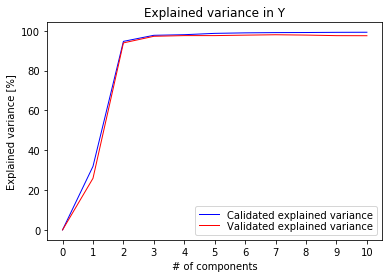

In [13]:
hplot.explainedVariance(NIRplsr)

The score plot shows how the NIR measurements relate to each other in a two dimensional compressed space. Calibrated explained variances for the axes are indicated on the axes.

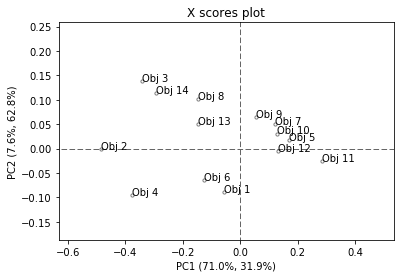

In [14]:
hplot.scores(NIRplsr)

Loading weights from PLSR on spectral data are best visualized as line plots. The loadings show how much weight each wavelength index is given when producing the principal components. For the gasoline data it seems that the highest variation is spanned by variables around indexes 125-160, 230-250 and 360-401.

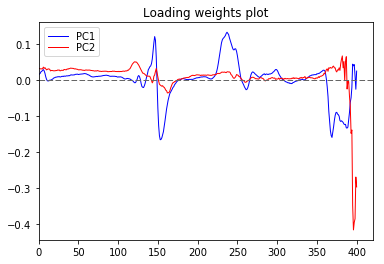

In [15]:
hplot.loadings(NIRplsr, weights=True, line=True)

The success of predictions can also visualized by plotting predictions versus reference values for a chosen number of components.

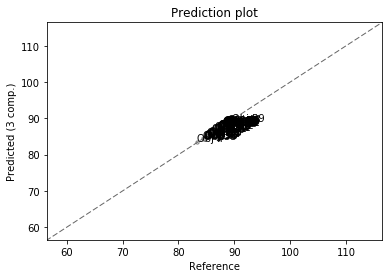

In [16]:
hplot.predict(NIRplsr, comp=3)

The variable weights used for prediction are the regression coefficients. 

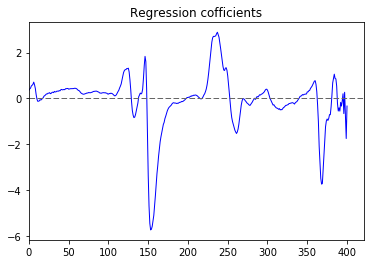

In [17]:
hplot.coefficients(NIRplsr, comp=3)

### Custom plots:
If we colour the score plot, we see how the major variation in octane is distributed through the first two score vectors.

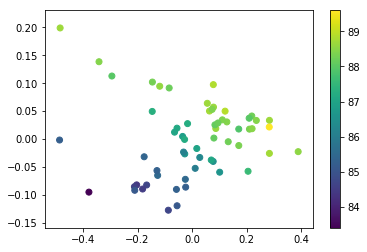

In [18]:
scores = NIRplsr.X_scores()[:,:2]
plt.scatter(scores[:,0],scores[:,1], c = octane)
plt.colorbar()
plt.show()

## Partial Least Squares regression with air pollution data

Read air pollution data in CSV format from GitHub and convert to numpy array.

In [19]:
airpolutionPD = pd.read_csv('https://raw.githubusercontent.com/khliland/hoggormExamples/master/data/airpolution.csv', index_col=0)
airpolution = np.array(airpolutionPD)

### Perform PLSR on air pollution data
Exctract 2 components Non-Linear Partial Least Squares (NIPALS) based PLSR version and use leave-one-out cross-validation for model evaluation/summaries.

In [20]:
AIRPOLUTIONplsr = hogg.nipalsPLS2(airpolution[:,:3], airpolution[:,3:], 3, cvType = ["loo"])

loo


### Plotting
The explained variance shows what percentage of the spectral variation is covered by the PLSR up to a chosen number of components.

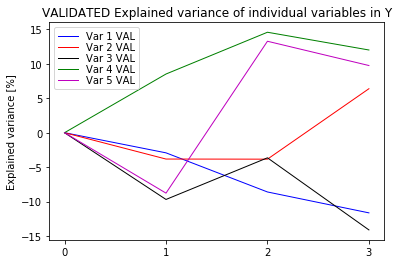

In [21]:
hplot.explainedVariance(AIRPOLUTIONplsr, individual=True)

Plot predictor scores and predictor loadings simultaneously through biplot.

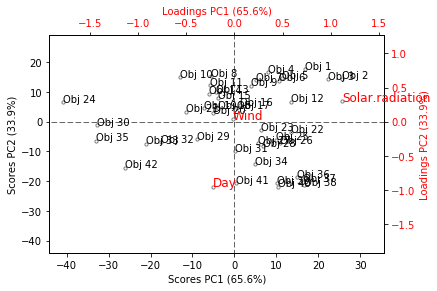

In [22]:
hplot.biplot(AIRPOLUTIONplsr, XvarNames=list(airpolutionPD.columns.values[:3]))

Repeat with response loadings and response scores.

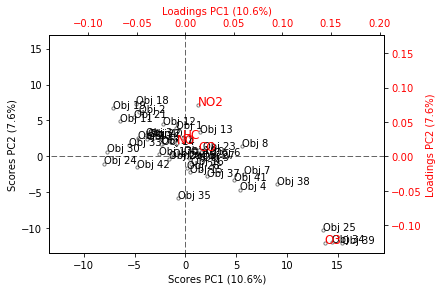

In [23]:
hplot.biplot(AIRPOLUTIONplsr, which="Y", YvarNames=list(airpolutionPD.columns.values[3:]))